In [27]:
# Python
import numpy as np
import pandas as pd
from prophet import Prophet
from scipy import stats

In [28]:
try:
    df = pd.read_csv('/pmn_data.csv')
except:
    print("well that didn't work...")

In [79]:
print(df['spec_name'].mode()) # Coscinodiscus morphotype is the modal phytoplankton with 1482 samples
x = df.loc[(df['sampl_site'] == 'TX - Drum Bay') &  (df['spec_name'] == 'Coscinodiscus morphotype')]
x = x[(np.abs(stats.zscore(df['y'])) < 3)]
y = df.loc[(df['sampl_site'] == 'TX - Port O\'Connor Fishing Pier') & (df['spec_name'] == 'Coscinodiscus morphotype')]
y = y[(np.abs(stats.zscore(df['y'])) < 3)]
z = df.loc[(df['sampl_site'] == 'TX - Jims Pier') & (df['spec_name'] == 'Coscinodiscus morphotype')]
z = z[(np.abs(stats.zscore(df['y'])) < 3)]

a = df.loc[(df['sampl_site'] == 'TX - Drum Bay') &  (df['spec_name'] == 'Pseudo-nitzschia spp.')]
a = a[(np.abs(stats.zscore(df['y'])) < 3)]
b = df.loc[(df['sampl_site'] == 'TX - Port O\'Connor Fishing Pier') & (df['spec_name'] == 'Pseudo-nitzschia spp.')]
b = b[(np.abs(stats.zscore(df['y'])) < 3)]
c = df.loc[(df['sampl_site'] == 'TX - Jims Pier') & (df['spec_name'] == 'Pseudo-nitzschia spp.')]
c = c[(np.abs(stats.zscore(df['y'])) < 3)]

# Odontella spp.

a_o = df.loc[(df['sampl_site'] == 'TX - Drum Bay') &  (df['spec_name'] == 'Odontella spp.')]
a_o = a_o[(np.abs(stats.zscore(df['y'])) < 3)]
b_o = df.loc[(df['sampl_site'] == 'TX - Port O\'Connor Fishing Pier') & (df['spec_name'] == 'Odontella spp.')]
b_o = b_o[(np.abs(stats.zscore(df['y'])) < 3)]
c_o = df.loc[(df['sampl_site'] == 'TX - Jims Pier') & (df['spec_name'] == 'Odontella spp.')]
c_o = c_o[(np.abs(stats.zscore(df['y'])) < 3)]


0    Coscinodiscus morphotype
Name: spec_name, dtype: object


<ipython-input-79-559982129178>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = x[(np.abs(stats.zscore(df['y'])) < 3)]
<ipython-input-79-559982129178>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = y[(np.abs(stats.zscore(df['y'])) < 3)]
<ipython-input-79-559982129178>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  z = z[(np.abs(stats.zscore(df['y'])) < 3)]
<ipython-input-79-559982129178>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = a[(np.abs(stats.zscore(df['y'])) < 3)]
<ipython-input-79-559982129178>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b = b[(np.abs(stats.zscore(df['y'])) < 3)]
<ipython-input-79-559982129178>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = c[(np.abs(stats.zscore(df['y'])) < 3)]
<ipython-input-79-559982129178>:19: UserWarning: Boolean Seri

In [80]:
frames   = [x,y,z]
framesb  = [a,b,c]
frames_o = [a_o,b_o,c_o]

Texas = pd.concat(frames)
Texas_b = pd.concat(framesb) # Aggregate of the two plankton species that have had their outliers removed 
Texas_o = pd.concat(frames_o)

m = Prophet()
m.fit(Texas)

m2 = Prophet()
m2.fit(Texas_b)

m3 = Prophet()
m3.fit(Texas_o)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4mvytu5/9oxpuw6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4mvytu5/icbtmdzr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10843', 'data', 'file=/tmp/tmp_4mvytu5/9oxpuw6r.json', 'init=/tmp/tmp_4mvytu5/icbtmdzr.json', 'output', 'file=/tmp/tmp_4mvytu5/prophet_modelyxp4dnd3/prophet_model-20230406161155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4mvytu5/f79xh_0o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_4mvytu5/8wxk58un.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [81]:
future = m.make_future_dataframe(periods=365)
future.tail()

second_future = m2.make_future_dataframe(periods=365)
future.tail()

second_future = m2.make_future_dataframe(periods=365)
second_future.tail()

third_future = m3.make_future_dataframe(periods=365)
third_future.tail()

,ds
448,2012-10-28 12:35:00
449,2012-10-29 12:35:00
450,2012-10-30 12:35:00
451,2012-10-31 12:35:00
452,2012-11-01 12:35:00


In [82]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
536,2012-11-18 15:55:00,32.495489,-48.841982,116.454746
537,2012-11-19 15:55:00,53.797805,-22.384032,128.074770
538,2012-11-20 15:55:00,55.307659,-28.200567,133.406768
539,2012-11-21 15:55:00,79.324800,-0.075454,158.211146
540,2012-11-22 15:55:00,31.607069,-48.834012,112.503909


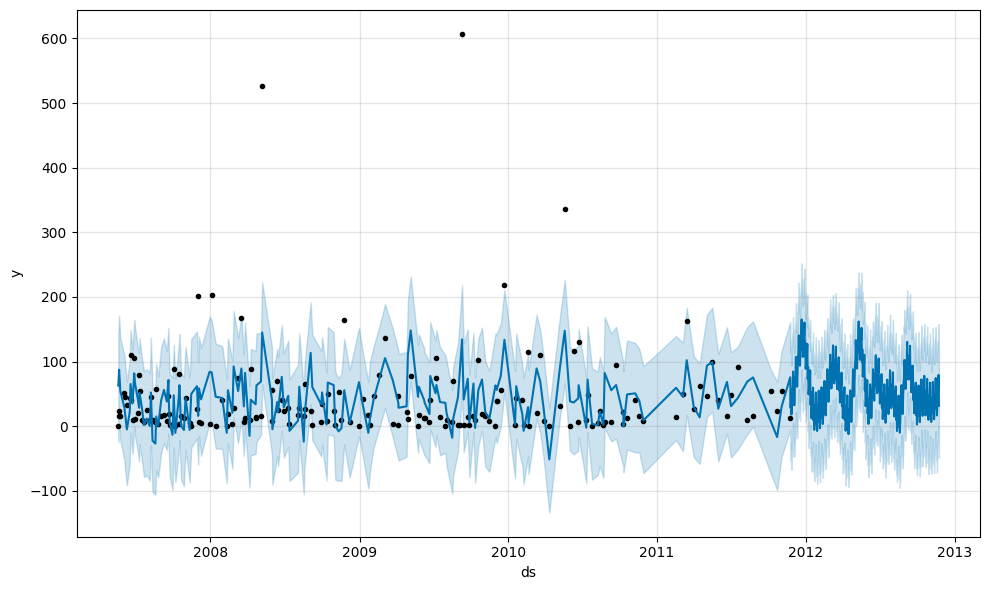

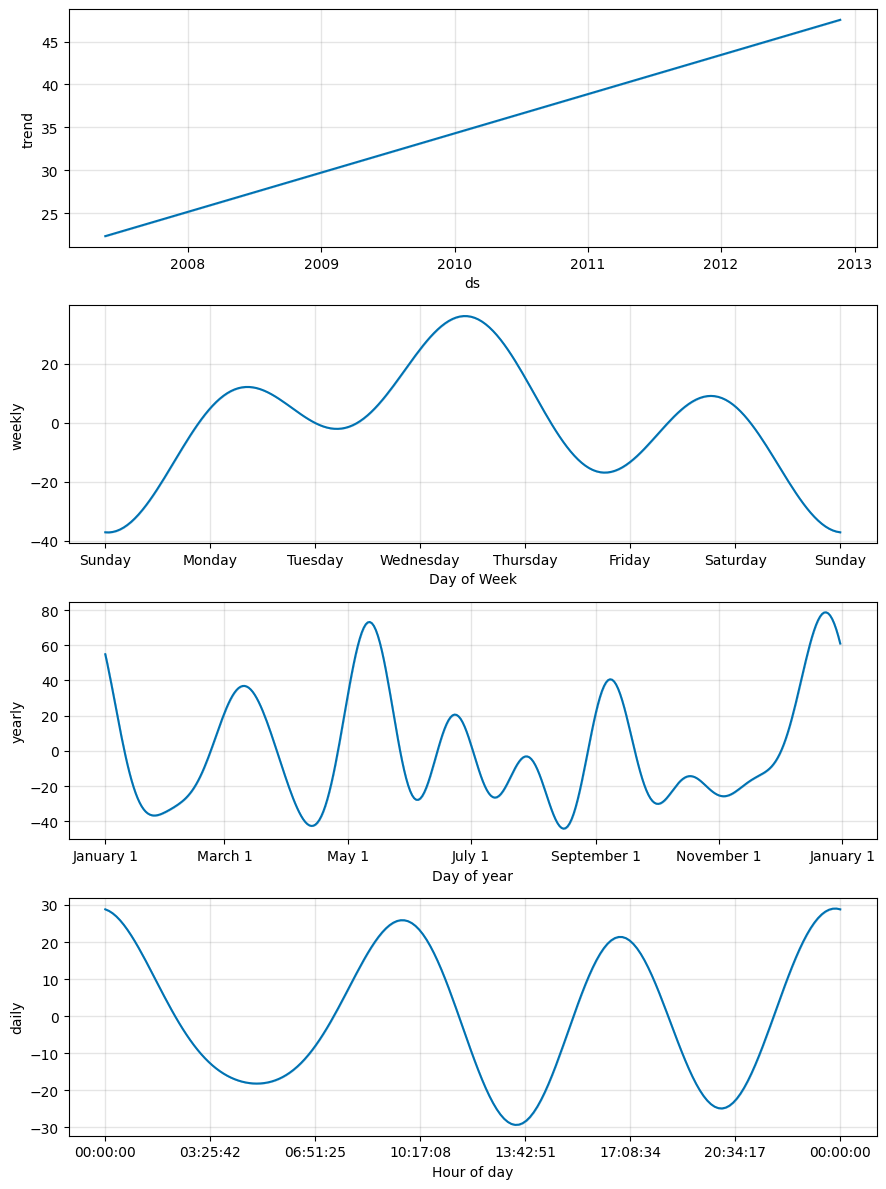

In [83]:
fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [84]:
forecast2 = m2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
536,2012-11-18 15:55:00,206.645841,-89.006264,516.045380
537,2012-11-19 15:55:00,30.807516,-273.519453,324.503784
538,2012-11-20 15:55:00,103.188675,-164.429699,403.610589
539,2012-11-21 15:55:00,178.421373,-115.673659,476.135035
540,2012-11-22 15:55:00,102.576291,-214.046880,400.398371


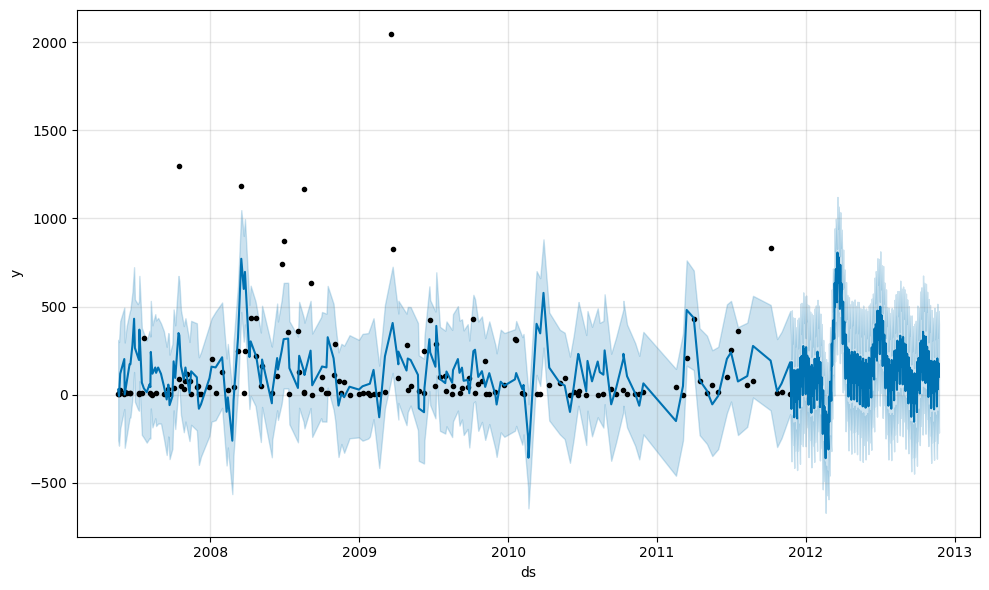

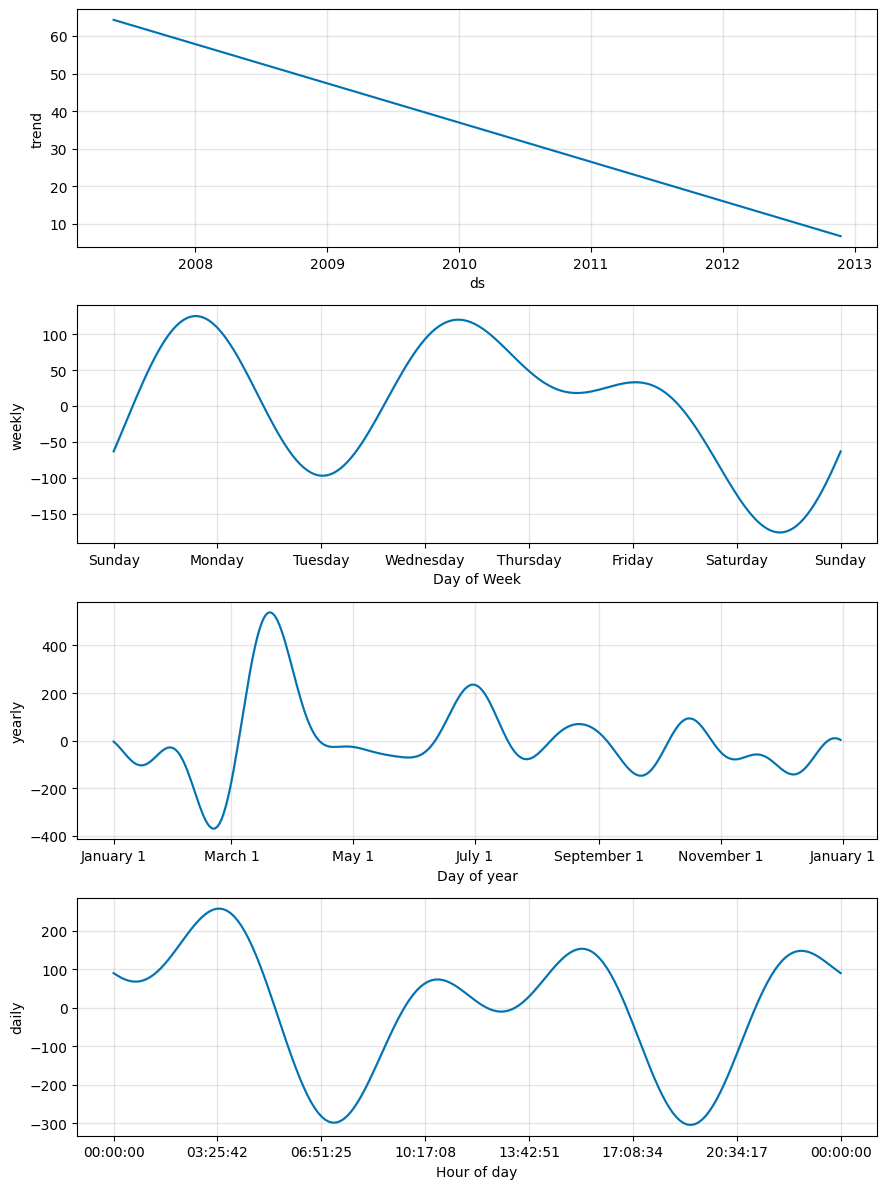

In [85]:
fig3 = m2.plot(forecast2)
fig4 = m2.plot_components(forecast2)

In [86]:
forecast3 = m3.predict(future)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
536,2012-11-18 15:55:00,-3.556027,-30.935603,22.181051
537,2012-11-19 15:55:00,3.658282,-24.635034,28.452638
538,2012-11-20 15:55:00,-3.934142,-31.042317,23.583273
539,2012-11-21 15:55:00,3.717285,-23.228401,31.542923
540,2012-11-22 15:55:00,-6.671036,-34.037011,18.331032


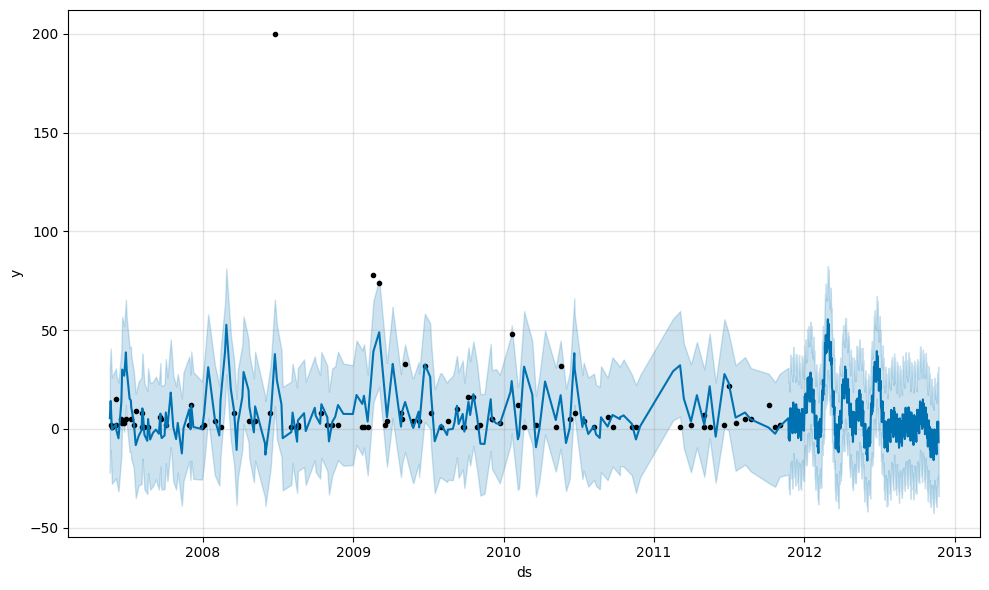

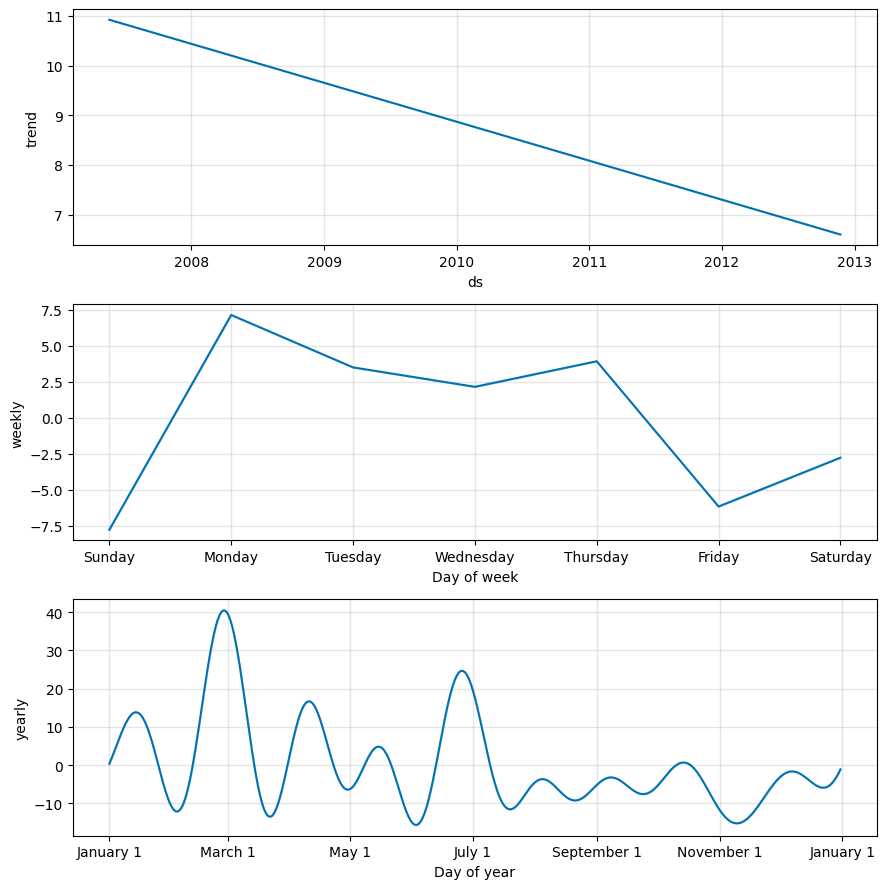

In [88]:
fig5 = m3.plot(forecast3)
fig6 = m3.plot_components(forecast3)